# Check Building Blocks
We go through the building blocks to identify features that a GNN should add to atoms and bonds

In [3]:
import pathlib
import sys

sys.path.append(str(pathlib.Path().resolve().parents[1]))

import pandas as pd
from rdkit import Chem

from src.util.db_utils import SynFermDatabaseConnection

In [4]:
con = SynFermDatabaseConnection()

In [10]:
df = pd.DataFrame(con.con.execute('SELECT long, category, SMILES FROM building_blocks').fetchall(), columns=['long', 'category', 'SMILES'])
df

,long,category,SMILES
0,2-Pyr002,I,O=C(c1cc(Cl)ccn1)[B-](F)(F)F.[K+]
1,2-Pyr003,I,O=C(c1cccc(Cl)n1)[B-](F)(F)F.[K+]
2,2-Pyr005,I,O=C(c1cccc(Br)n1)[B-](F)(F)F.[K+]
3,2-Pyr006,I,O=C(c1ccc(Br)cn1)[B-](F)(F)F.[K+]
4,2-Pyr007,I,O=C(c1cccc(F)n1)[B-](F)(F)F.[K+]
...,...,...,...
188,TerTH023,T,Cl.NNC(=S)c1cccc2[nH]ncc12
189,TerTH025,T,Cl.NNC(=S)c1c[nH]cn1
190,TerTH026,T,Cl.NNC(=S)c1cn[nH]c1
191,TerTH027,T,Cl.NNC(=S)c1ccc2[nH]nnc2c1


In [12]:
# what atom types are there?
atom_types = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        atom_types.add(atom.GetSymbol())
atom_types

{'B', 'Br', 'C', 'Cl', 'F', 'I', 'K', 'N', 'O', 'S', 'Si'}

In [14]:
# what atom degrees are there?
atom_degrees = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        atom_degrees.add(atom.GetDegree())
atom_degrees

{0, 1, 2, 3, 4}

In [15]:
# what formal charges are there?
formal_charges = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        formal_charges.add(atom.GetFormalCharge())
formal_charges

{-1, 0, 1}

In [16]:
# what number of total Hs are there?
total_hs = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        total_hs.add(atom.GetTotalNumHs())
total_hs

{0, 1, 2, 3}

In [18]:
# what hybridizations are there?
hybridizations = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        hybridizations.add(atom.GetHybridization())
hybridizations

{rdkit.Chem.rdchem.HybridizationType.S,
 rdkit.Chem.rdchem.HybridizationType.SP,
 rdkit.Chem.rdchem.HybridizationType.SP2,
 rdkit.Chem.rdchem.HybridizationType.SP3}

In [19]:
# what bond types are there?
bond_types = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for bond in mol.GetBonds():
        bond_types.add(bond.GetBondType())
bond_types

{rdkit.Chem.rdchem.BondType.SINGLE,
 rdkit.Chem.rdchem.BondType.DOUBLE,
 rdkit.Chem.rdchem.BondType.TRIPLE,
 rdkit.Chem.rdchem.BondType.AROMATIC}

In [20]:
# what bond stereochemistries are there?
bond_stereochemistries = set()
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for bond in mol.GetBonds():
        bond_stereochemistries.add(bond.GetStereo())
bond_stereochemistries

{rdkit.Chem.rdchem.BondStereo.STEREONONE, rdkit.Chem.rdchem.BondStereo.STEREOE}

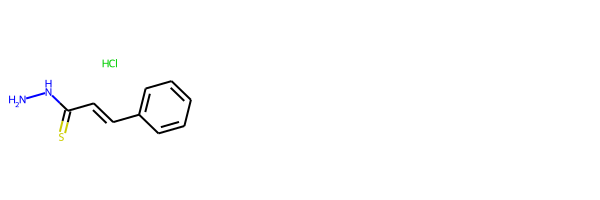

In [26]:
# which buildingblocks have E stereochemistry?
mols_e = []
for smiles in df.SMILES:
    mol = Chem.MolFromSmiles(smiles)
    for bond in mol.GetBonds():
        if bond.GetStereo() == Chem.BondStereo.STEREOE:
            mols_e.append(mol)
Chem.Draw.MolsToGridImage(mols_e, molsPerRow=3)


## Conclusions

For most properties, the data covers the usual values.
For bond stereochemistry however, we seem to have only E or no stereochemistry, and we only have a single example of E.
This limitation is worth bearing in mind.

For the featurization, we should probably leave this out entirely.